# CONNOR TOU | BIOE131 (Lab 8 & 9)

In [5]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import math
import numpy as np
%matplotlib inline

# Lab 8 

### Command used to run spades
```
spades.py -1 /data/Lab8_data/illumina_reads_R1.fastq -2 /data/Lab8_data/illumina_reads_R2.fastq --pacbio /data/Lab8_data/pacbio_reads.fastq -t 1 -o Lab8_Spades
```

### Questions
***Why do we expect short reads to produce a more fragmented assembly than long reads?***
* With shorter reads, more reads are required to cover the whole genome. Thus, short reads lead to a more fragmented assembly than long reads (i.e. there are more contigs). 

***Why does a single-molecule sequencing like PacBio have a higher error rate than Illumina?***
* PacBio uses single-molecule sequencing, which provides longer reads at the cost of a higher error rate than Illumina. The sequence uses a single DNA polymerase and a single DNA template molecule. Single molecule sequencing uses zero-mode waveguide  to detect nucleotides which are binding to the template. This cannot differentiate a nucleotide that enters the well and diffuses out from a nucleotide that binds the template. Thus, a single run of single-molecule sequencing creats more errors. To compensate, PacBio performs multiple reads of the same template using circular concensus sequencing (but this is still higher error than Illumina). 

# Lab 9 

## Assembly Statistics

```
[5367152@ip-172-30-0-105 ~]$ tmux new -s lab8/1 s/scaffolds.fasta 
stats for Lab8_Spades/contigs.fasta
sum = 6678635, n = 176, ave = 37946.79, largest = 414008
N50 = 234690, n = 11
N60 = 202142, n = 14
N70 = 154232, n = 18
N80 = 103367, n = 23
N90 = 81286, n = 30
N100 = 128, n = 176
N_count = 0
Gaps = 0
-------------------------------------------------------------------------------
stats for Lab8_Spades/scaffolds.fasta
sum = 6678655, n = 174, ave = 38383.07, largest = 414008
N50 = 234690, n = 11
N60 = 202142, n = 14
N70 = 154232, n = 18
N80 = 103367, n = 23
N90 = 81821, n = 30
N100 = 128, n = 174
N_count = 20
Gaps = 2
```

N50 = 234690, n = 11 (50% of the assembly is contained in the 11 longest read)

Total length of all contigs = 6678635 | Total length of all scaffolds = 6678655
Number of contigs = 176 | Number of scaffolds = 174

### QUESTIONS:
***Why is N50 is useful statistic to calculate? Why not just list the mean or median contig length?***
* A high N50 contig length means that the assembly is of good quality - mainly long reads being used. A low N50 means a number of small reads have been combined to build the assembly. Since a shorter sequence is more likely to find a match, this can lead to more errors. <br> 
* Just using the mean or the median contig length alone could be erroneous. It is common practice to remove the shortest contigs from an assembly - since having a bunch of overly short sequences (even if they are accurate) is suboptimal. Unfortunately, there are not standardized guidelines for this removal. Thus, methodology for removal varies between labs and between individual users. N50 is less subject to these individual choices and is less likely to change if the original dataset used is the same. Therefore, N50 gives a more accurate measure of the assembly quality.

***In your assembly, are scaffolds longer than contigs, or are scaffolds approximately equal to contigs?***
* The length of the scaffolds and contigs are approimately the same. (Only 2 gaps are indtoduced into the scaffolds)

## Extra Credit

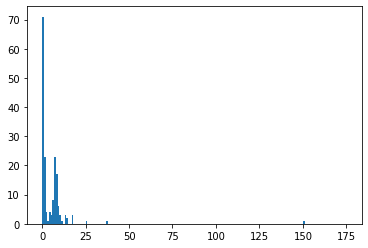

Average Coverage: 14.047804437500002


In [9]:
### Extract the coverage information from fasta file, create a list and plot the histogram
command_output = !grep '>' Lab8_Spades/contigs.fasta | cut -d "_" -f6
coverage_list = list(map(float, command_output ))
plt.hist(coverage_list, range(len(coverage_list)))
plt.show()

print("Average Coverage:", np.mean(coverage_list))

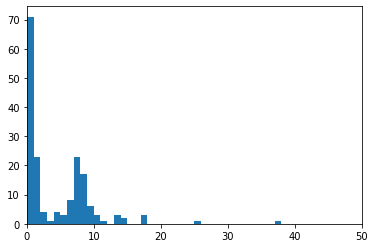

In [8]:
# A enlarged view of the histogram in range (0,50)
plt.hist(coverage_list, range(len(coverage_list)))

plt.xlim(left=0, right = 50)
plt.show()

### QUESTIONS:
***Is coverage uniformly distributed?***
* No, far from it. 

***Does it look Gaussian? Is it bimodal or trimodal?***	
* Bimodal with a peak at zero and a peak at seven. 

***What explains the presence of contigs with coverage an integer multiple of the mean coverage?***
* Regions of the genome that have been duplicated, which is common in bacteria, could explain an integer multiple of the mean coverage. This is not observed in our data where the mean coverage is ~14. 

## Identifying the Taxon from which this genome originated
***Please see the cells themselves to observe the commands used in the terminal***

In [1]:
# Locate the RNA genes with rna_hmm3.py and ouput to rRNA_locate in GFF
! rna_hmm3.py -L /data/Lab9_data/HMM3 -i Lab8_Spades/contigs.fasta -o Lab8_Spades/rRNA_locate

In [6]:
# Delete the lines that don't contain the string '16S' and ouput the results
! sed -i '/16S/!d' Lab8_Spades/rRNA_locate
! cat Lab8_Spades/rRNA_locate

NODE_23_length_103367_cov_10.081286	rna_hmm3	rRNA	35531	37075	0	+	NA	16S_rRNA
NODE_18_length_154232_cov_9.584186	rna_hmm3	rRNA	124542	126086	0	+	NA	16S_rRNA
NODE_5_length_327223_cov_9.241629	rna_hmm3	rRNA	46286	47830	0	+	NA	16S_rRNA
NODE_6_length_298784_cov_8.918606	rna_hmm3	rRNA	13926	15470	0	+	NA	16S_rRNA
NODE_4_length_332509_cov_9.114046	rna_hmm3	rRNA	137012	138556	0	-	NA	16S_rRNA
NODE_2_length_378948_cov_10.006665	rna_hmm3	rRNA	348500	350044	0	+	NA	16S_rRNA


### I ran the above commands to find the location of all rRNA genes and then to extract those relative to the 16S ribosomal unit. 6 reads matched the 16S subunit (as shown above). I then stored these in a fasta file.

In [7]:
# Extract nucleic acid sequences of the genes identified and write to a fasta file
! bedtools getfasta -fi Lab8_Spades/contigs.fasta -bed Lab8_Spades/rRNA_locate > Lab8_Spades/16S_rRNA.fasta

### Using SeqMatch

Next, I went to Ribosomal Database Project’s SeqMatch tool to identify the origin of the genome using the created FASTA file. ***The genus is Pseudomonas.*** Here are the results

```
rootrank Root (6) (query sequences)           
       domain Bacteria  (6)
          phylum "Proteobacteria"  (6)
             class Gammaproteobacteria  (6)
                order Pseudomonadales  (6)
                   family Pseudomonadaceae  (6)
                      genus Pseudomonas  (6)
                         NODE_23_length_103367_cov_10.081286:35530-37075  [view selectable matches]
                         NODE_2_length_378948_cov_10.006665:348499-350044  [view selectable matches]
                         NODE_6_length_298784_cov_8.918606:13925-15470  [view selectable matches]
                         NODE_5_length_327223_cov_9.241629:46285-47830  [view selectable matches]
                         NODE_4_length_332509_cov_9.114046:137011-138556  [view selectable matches]
                         NODE_18_length_154232_cov_9.584186:124541-126086  [view selectable matches]
```

### Explain how you came to your conclusion
Clicking into the "view selectable matches", the S_ab score (highlighted in peach color below) returned for all the results is of 1 or very close to 1 - which suggests that all or nearly all the provided reads come from the Pseudomas genus. Note that the displayed results are for NODE_23, but this is nearly identical for all the nodes listed. 

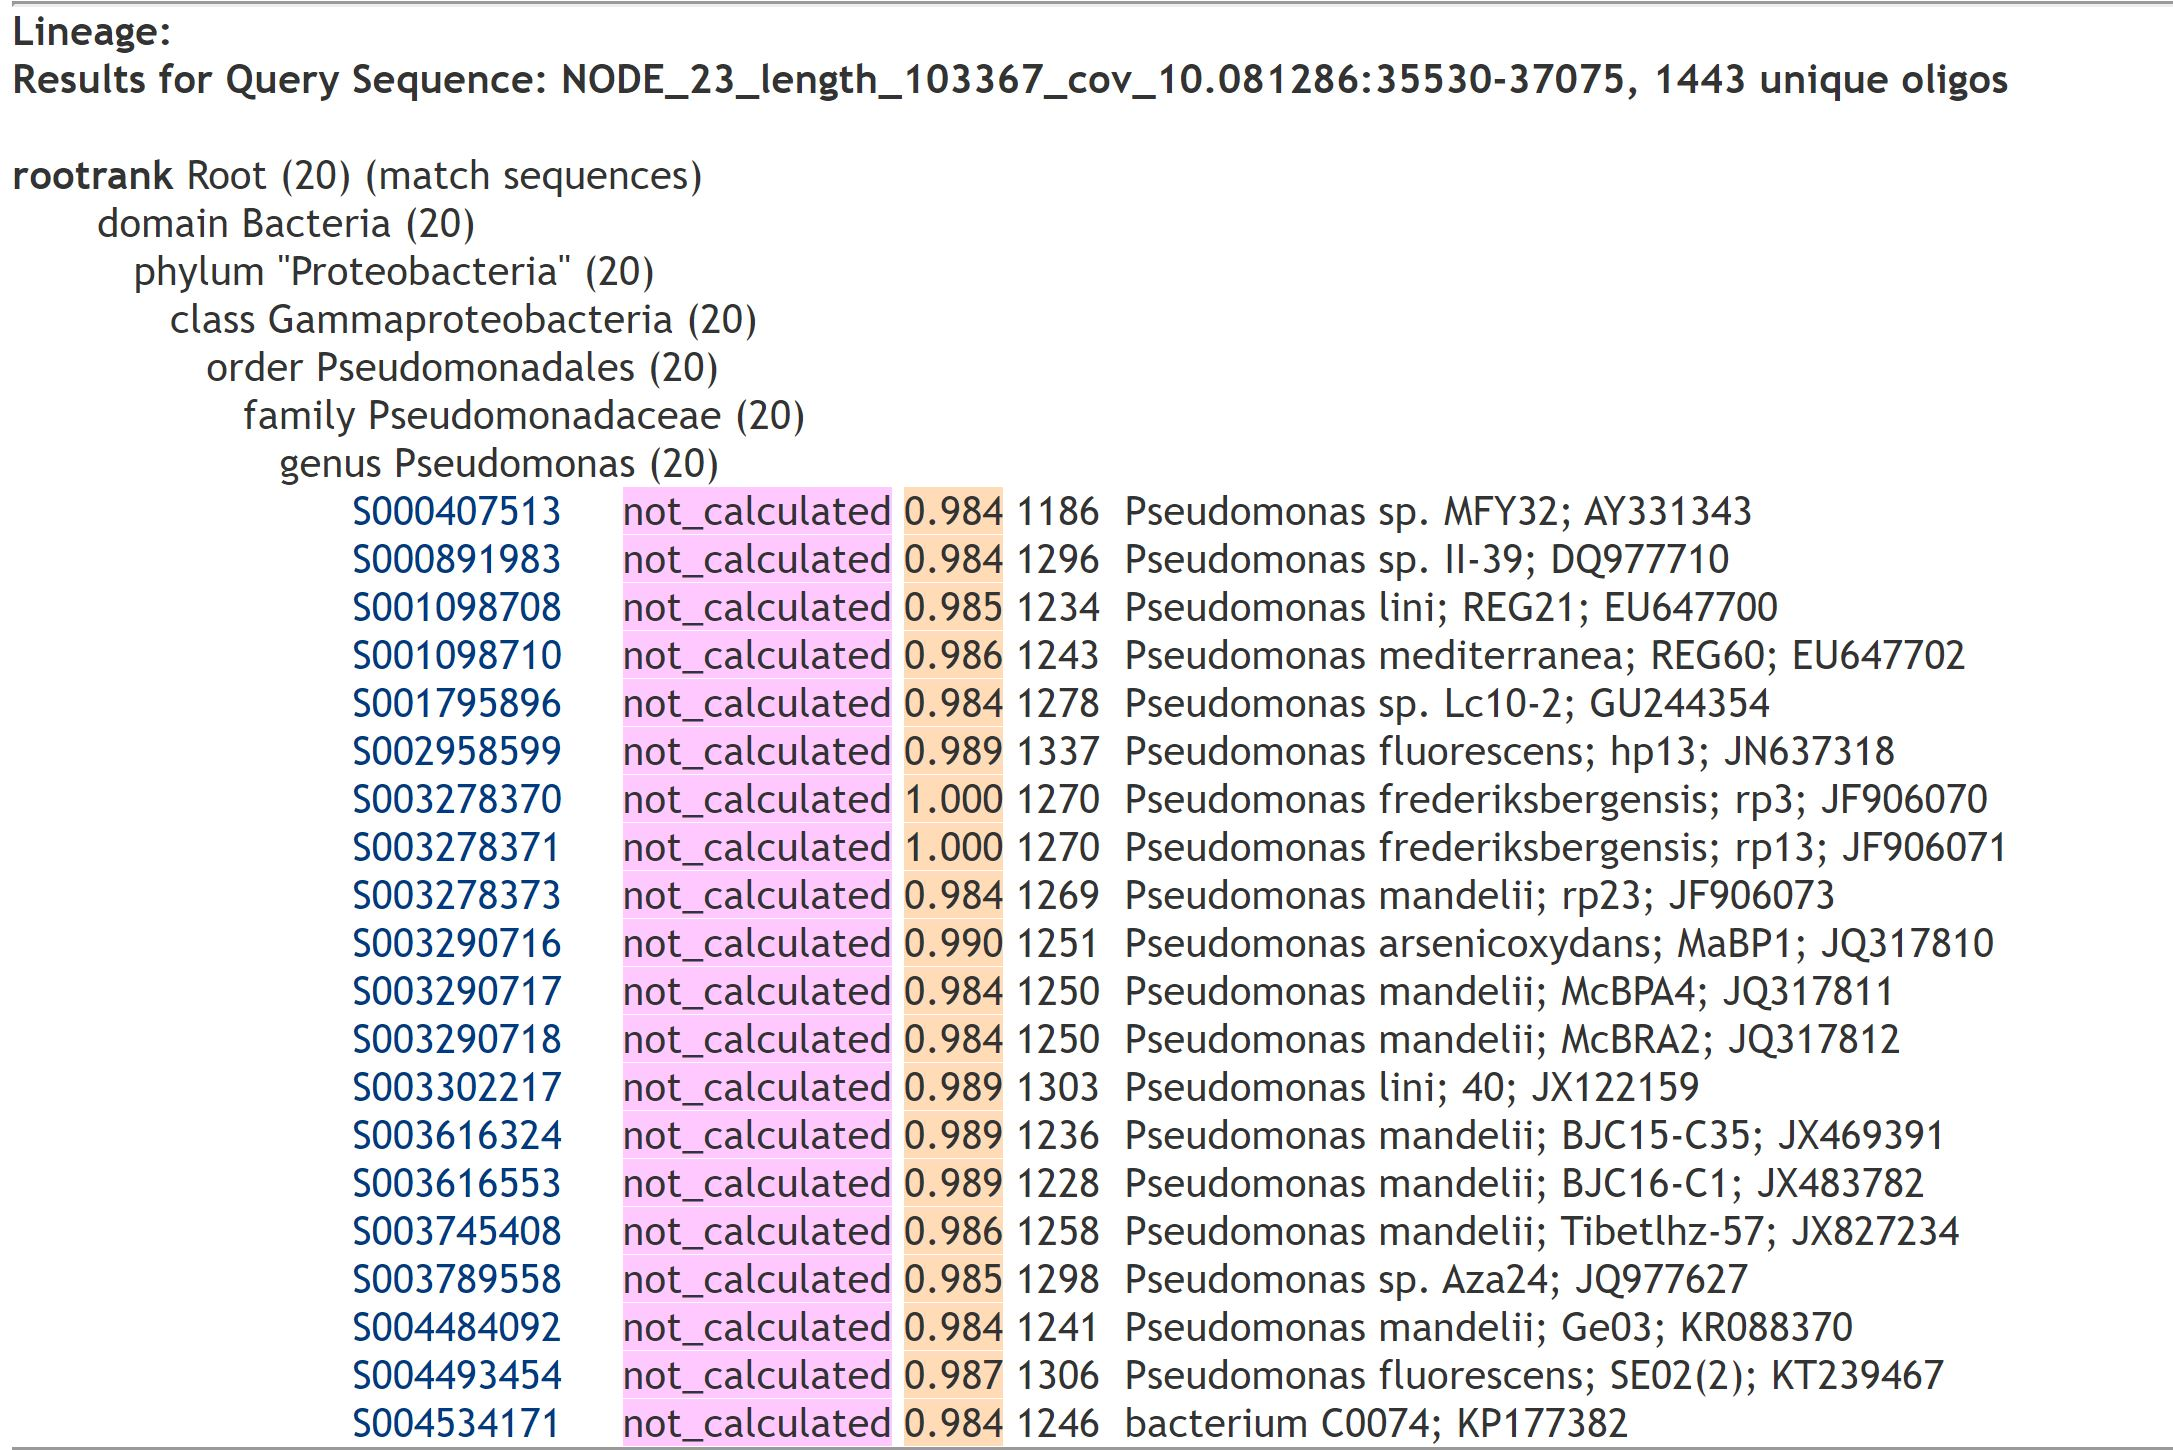

In [2]:
from IPython.display import Image
Image(filename='seqmatch.JPG') 

### Using RAST & BASys

### With RAST annotation, we can look at the closest neighbor based on our assembled genome. We looked at the species P. Aeruginosa for the rest of this lab. 

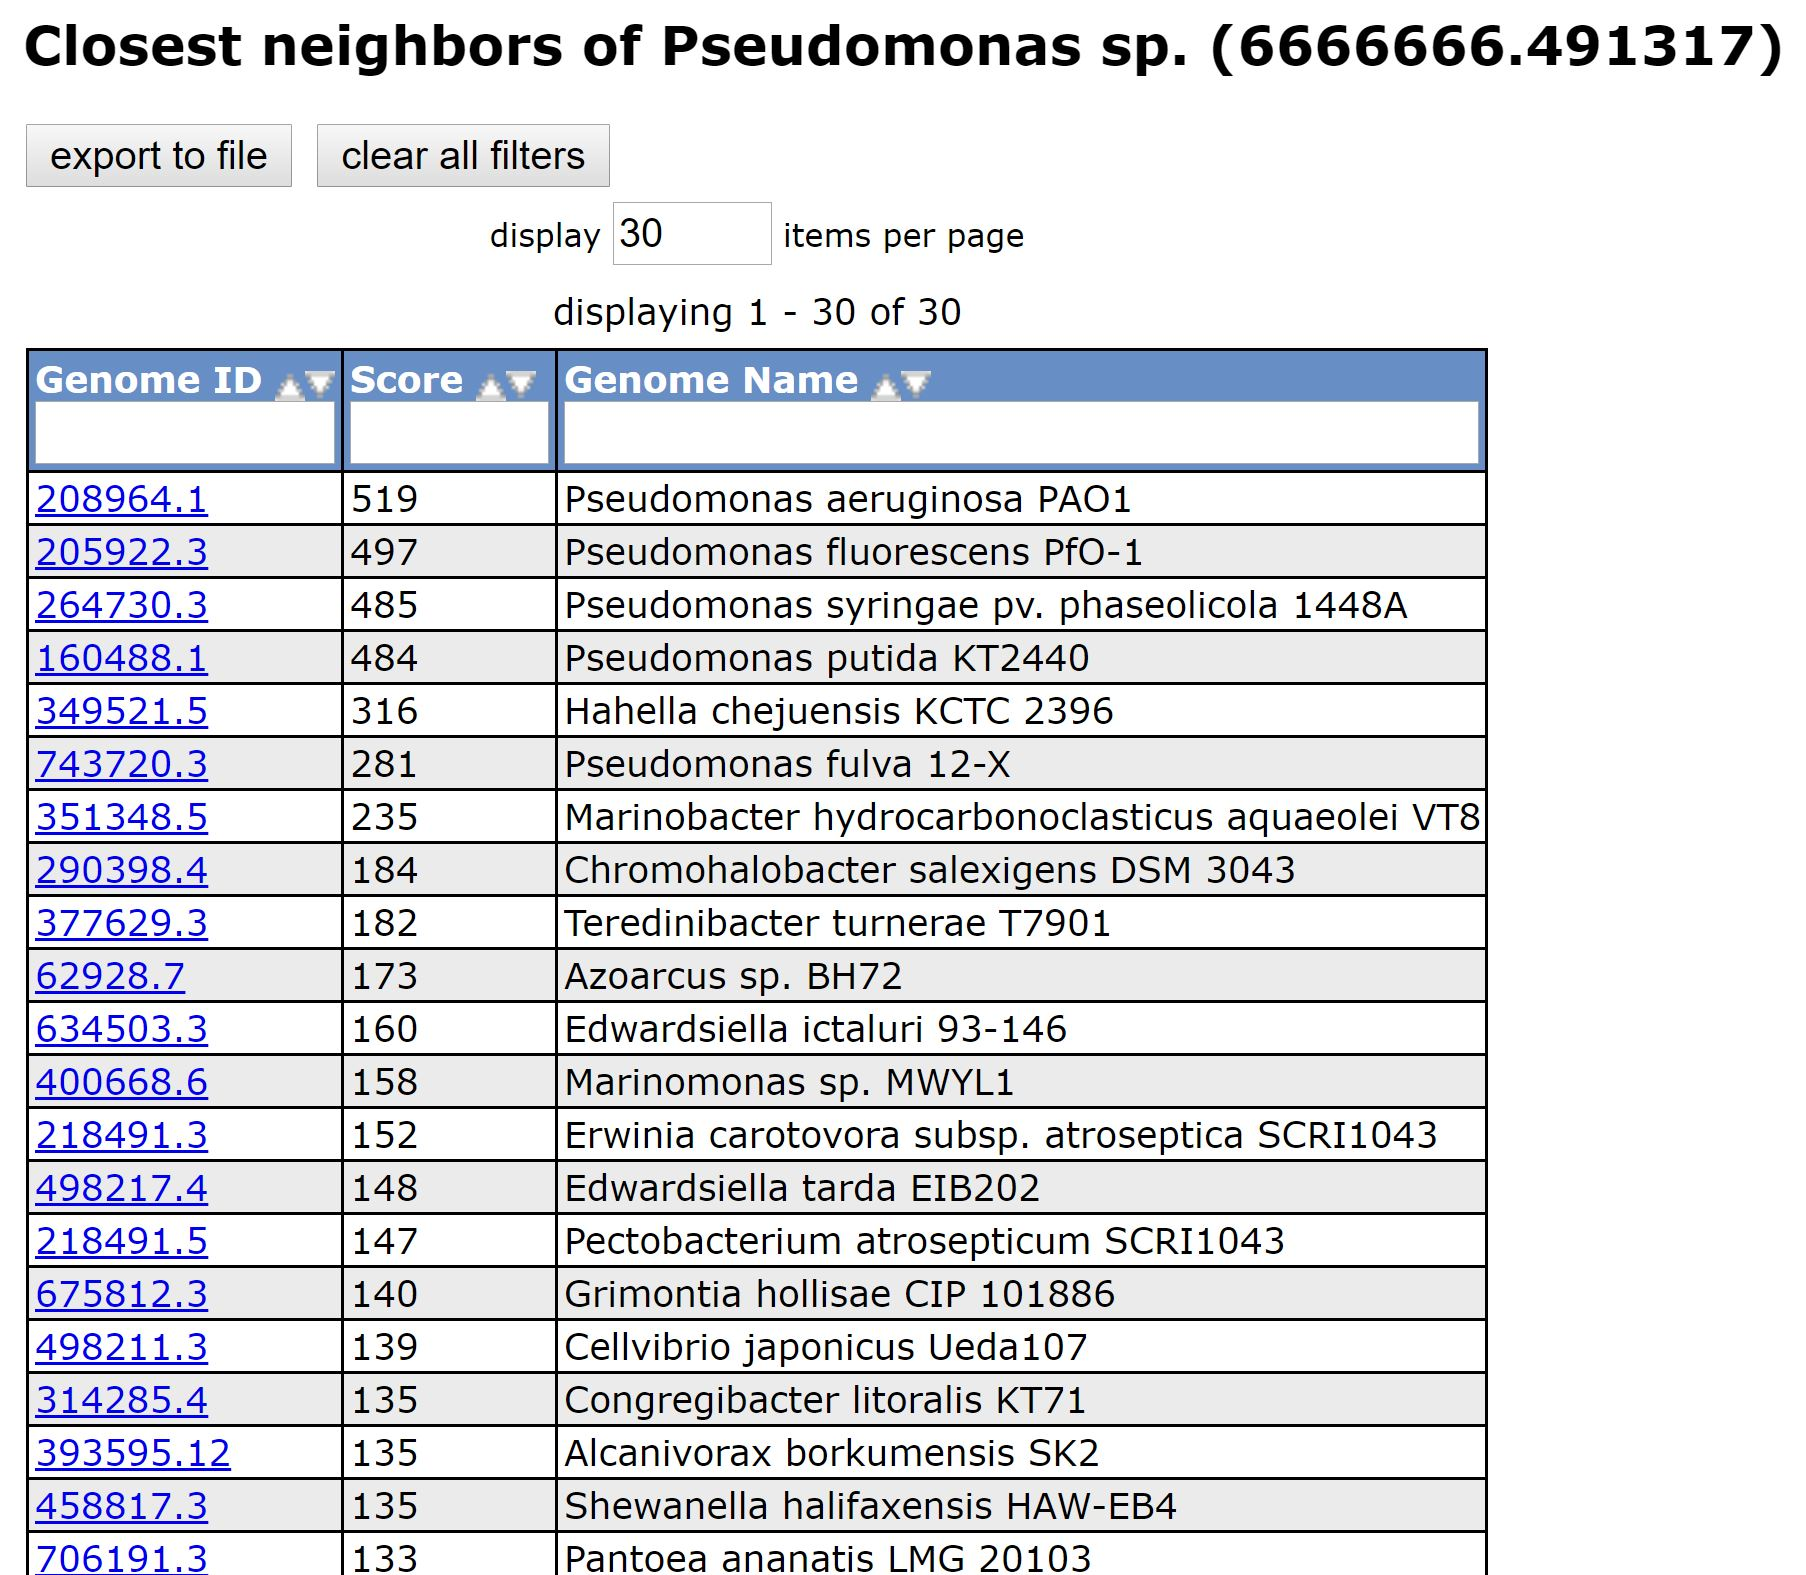

In [6]:
from IPython.display import Image
Image(filename='Lab8_Rast.JPG') 

**Species Summary:** Psuedomonas Aeruginosa is a gram-negative, rod-shaped bacterium that can cause disease (acute, chronic, and fatal) across both plant and animal species. Its ability to grow at 42°C and live in hypoxic environments is unique among Psuedomonas species. This ability to grow anaerobically is due to its ability to use nitrate or nitrite as a terminal electron acceptor in the electron trasport chain. Moreover, it is difficult to treat due to its multi-antibiotic resistance (as seen in the many genes - annotated by RAST - for antibiotic resistance and toxic-agent regulatory proteins), particularly because it forms largely impenetrable biofilms. Notably, P. Aeruginosa's infection efficacy is highly reliant on iron and systems to regulate iron uptake. Furthermore, there are three main lineages of P. aeruginosa, characterised by the fully sequenced genomes of PAO1, PA14, and PA7. Here we are focused on PAO1. With these two last facts, I will focus on iron uptake of the PAO1 lineage in my literature search, informed by RAST information. 

### Based on the subsystem feature couts, it is not surprising that P. Aeruginosa has characteristic multi-drug resistance. (Note that this is the graph generated for our assembled genome, which has a closest neighbor of P. Aeuriginosa, and not P. Aeurignosa's genome exactly)

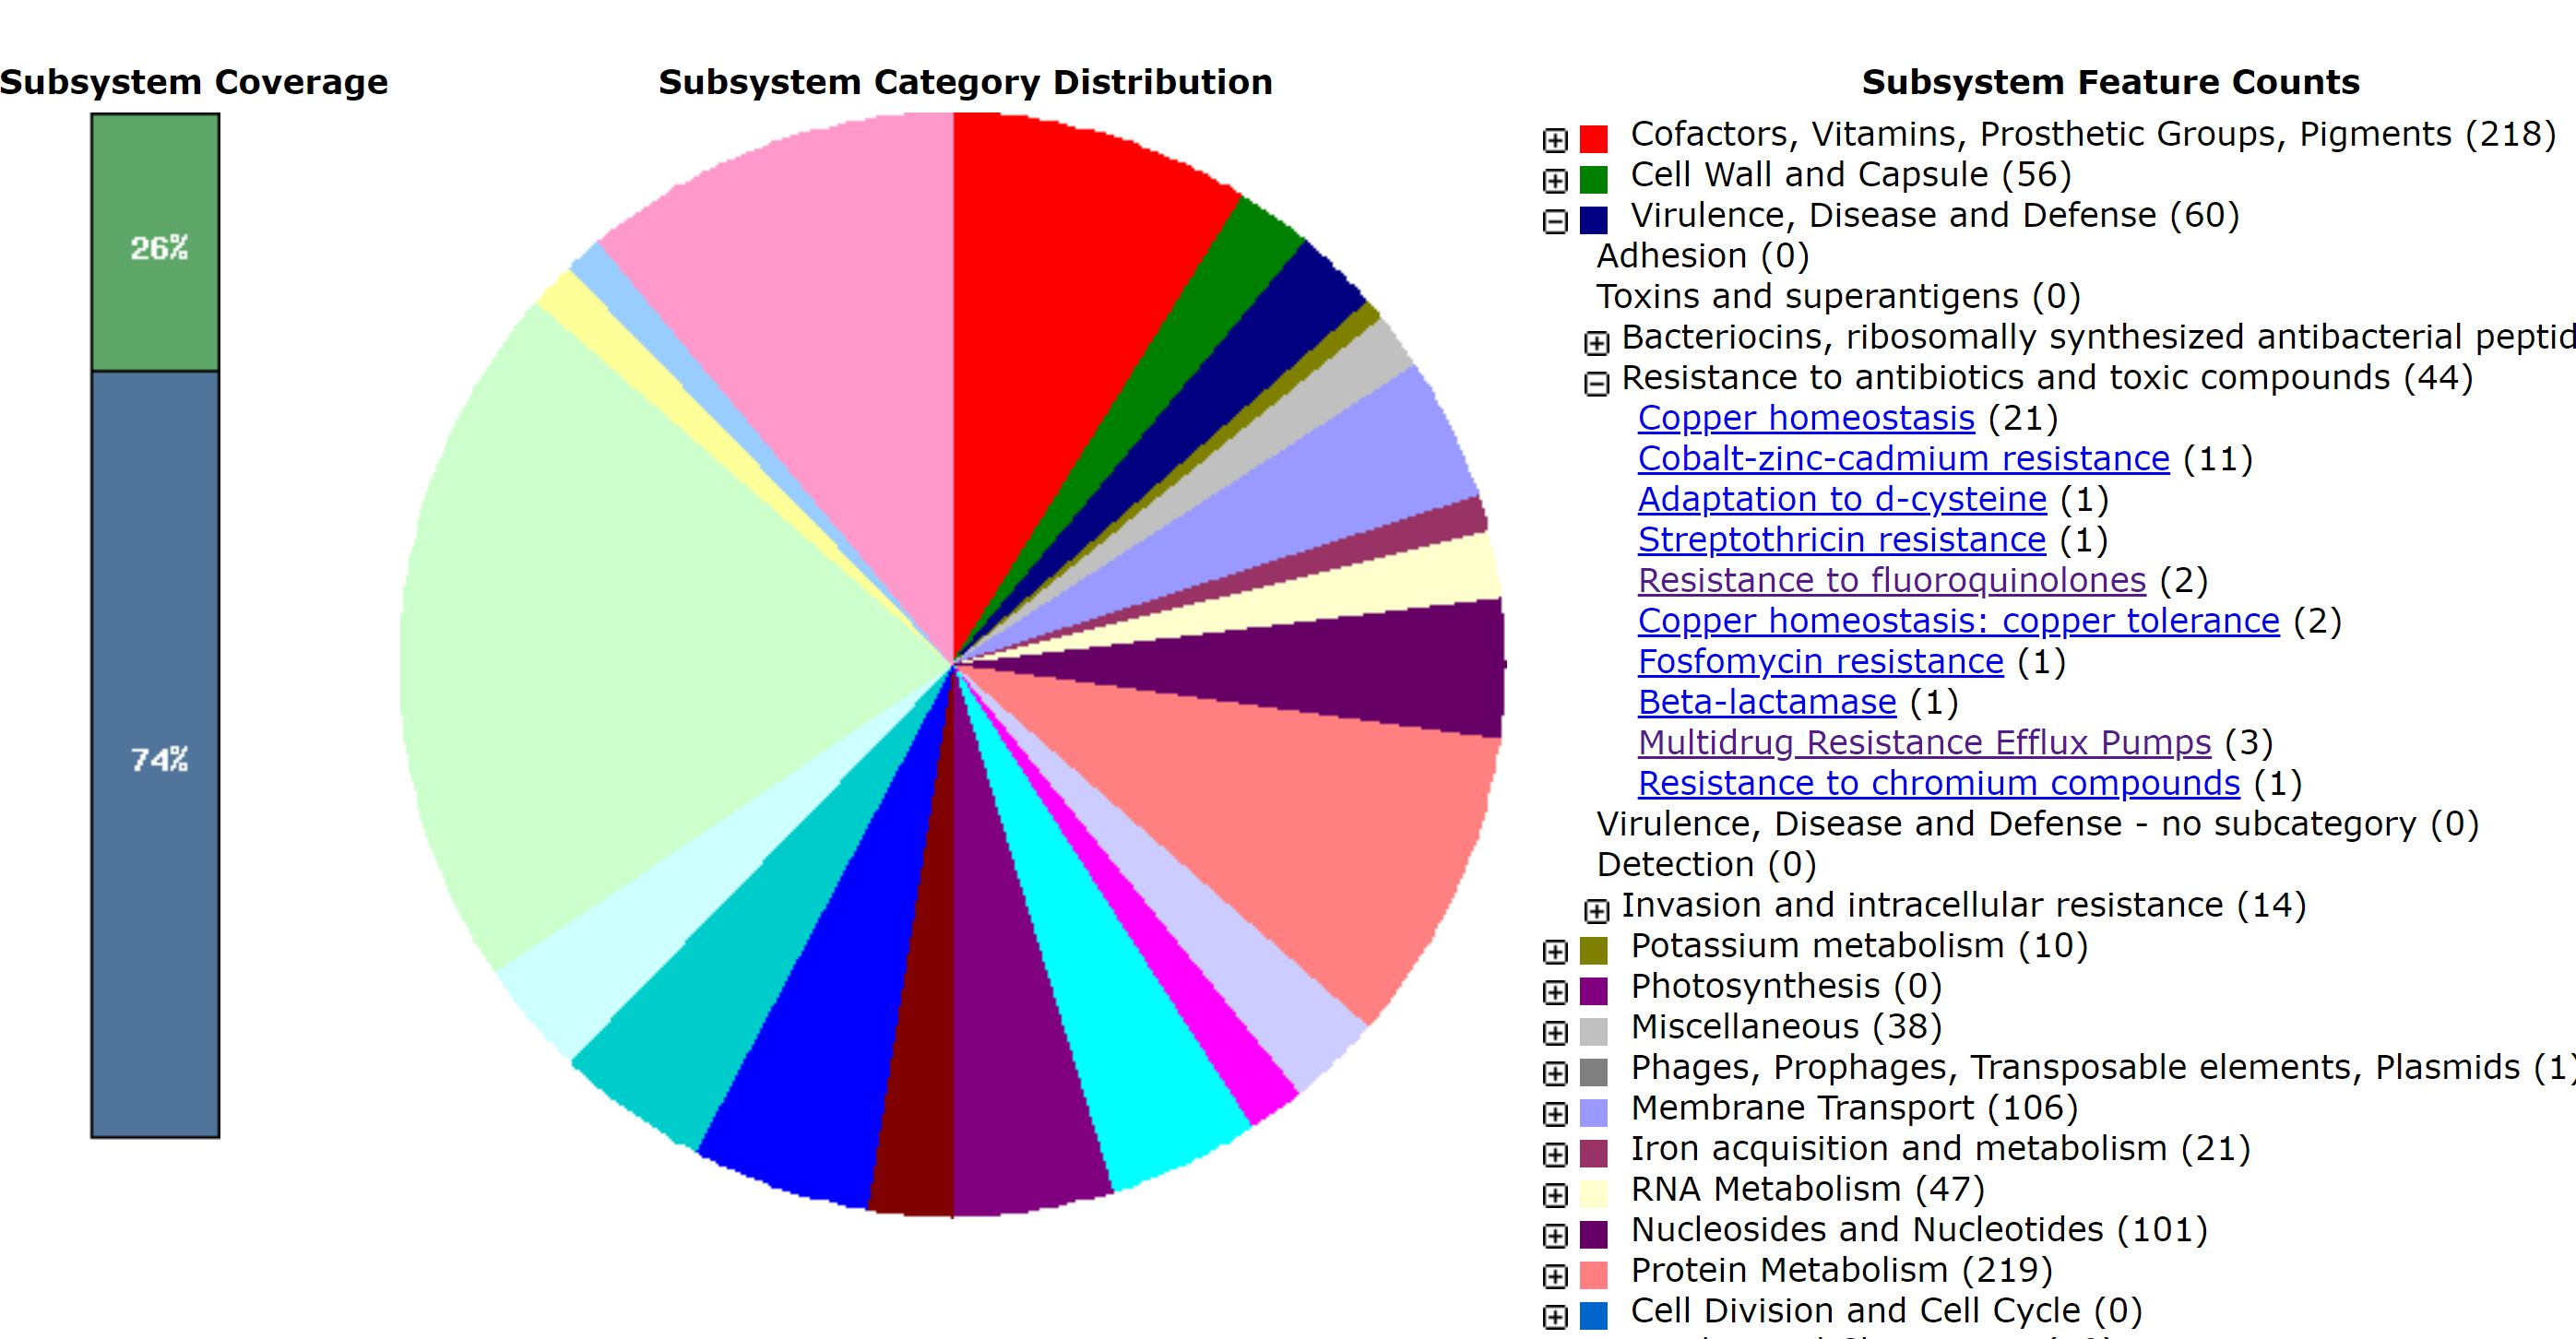

In [12]:
Image(filename='antibiotic.JPG')

### Here is the subsystem feature counts for the actual P. Aeruginosa genome with expanded view for antibiotic and toxic compound resistance

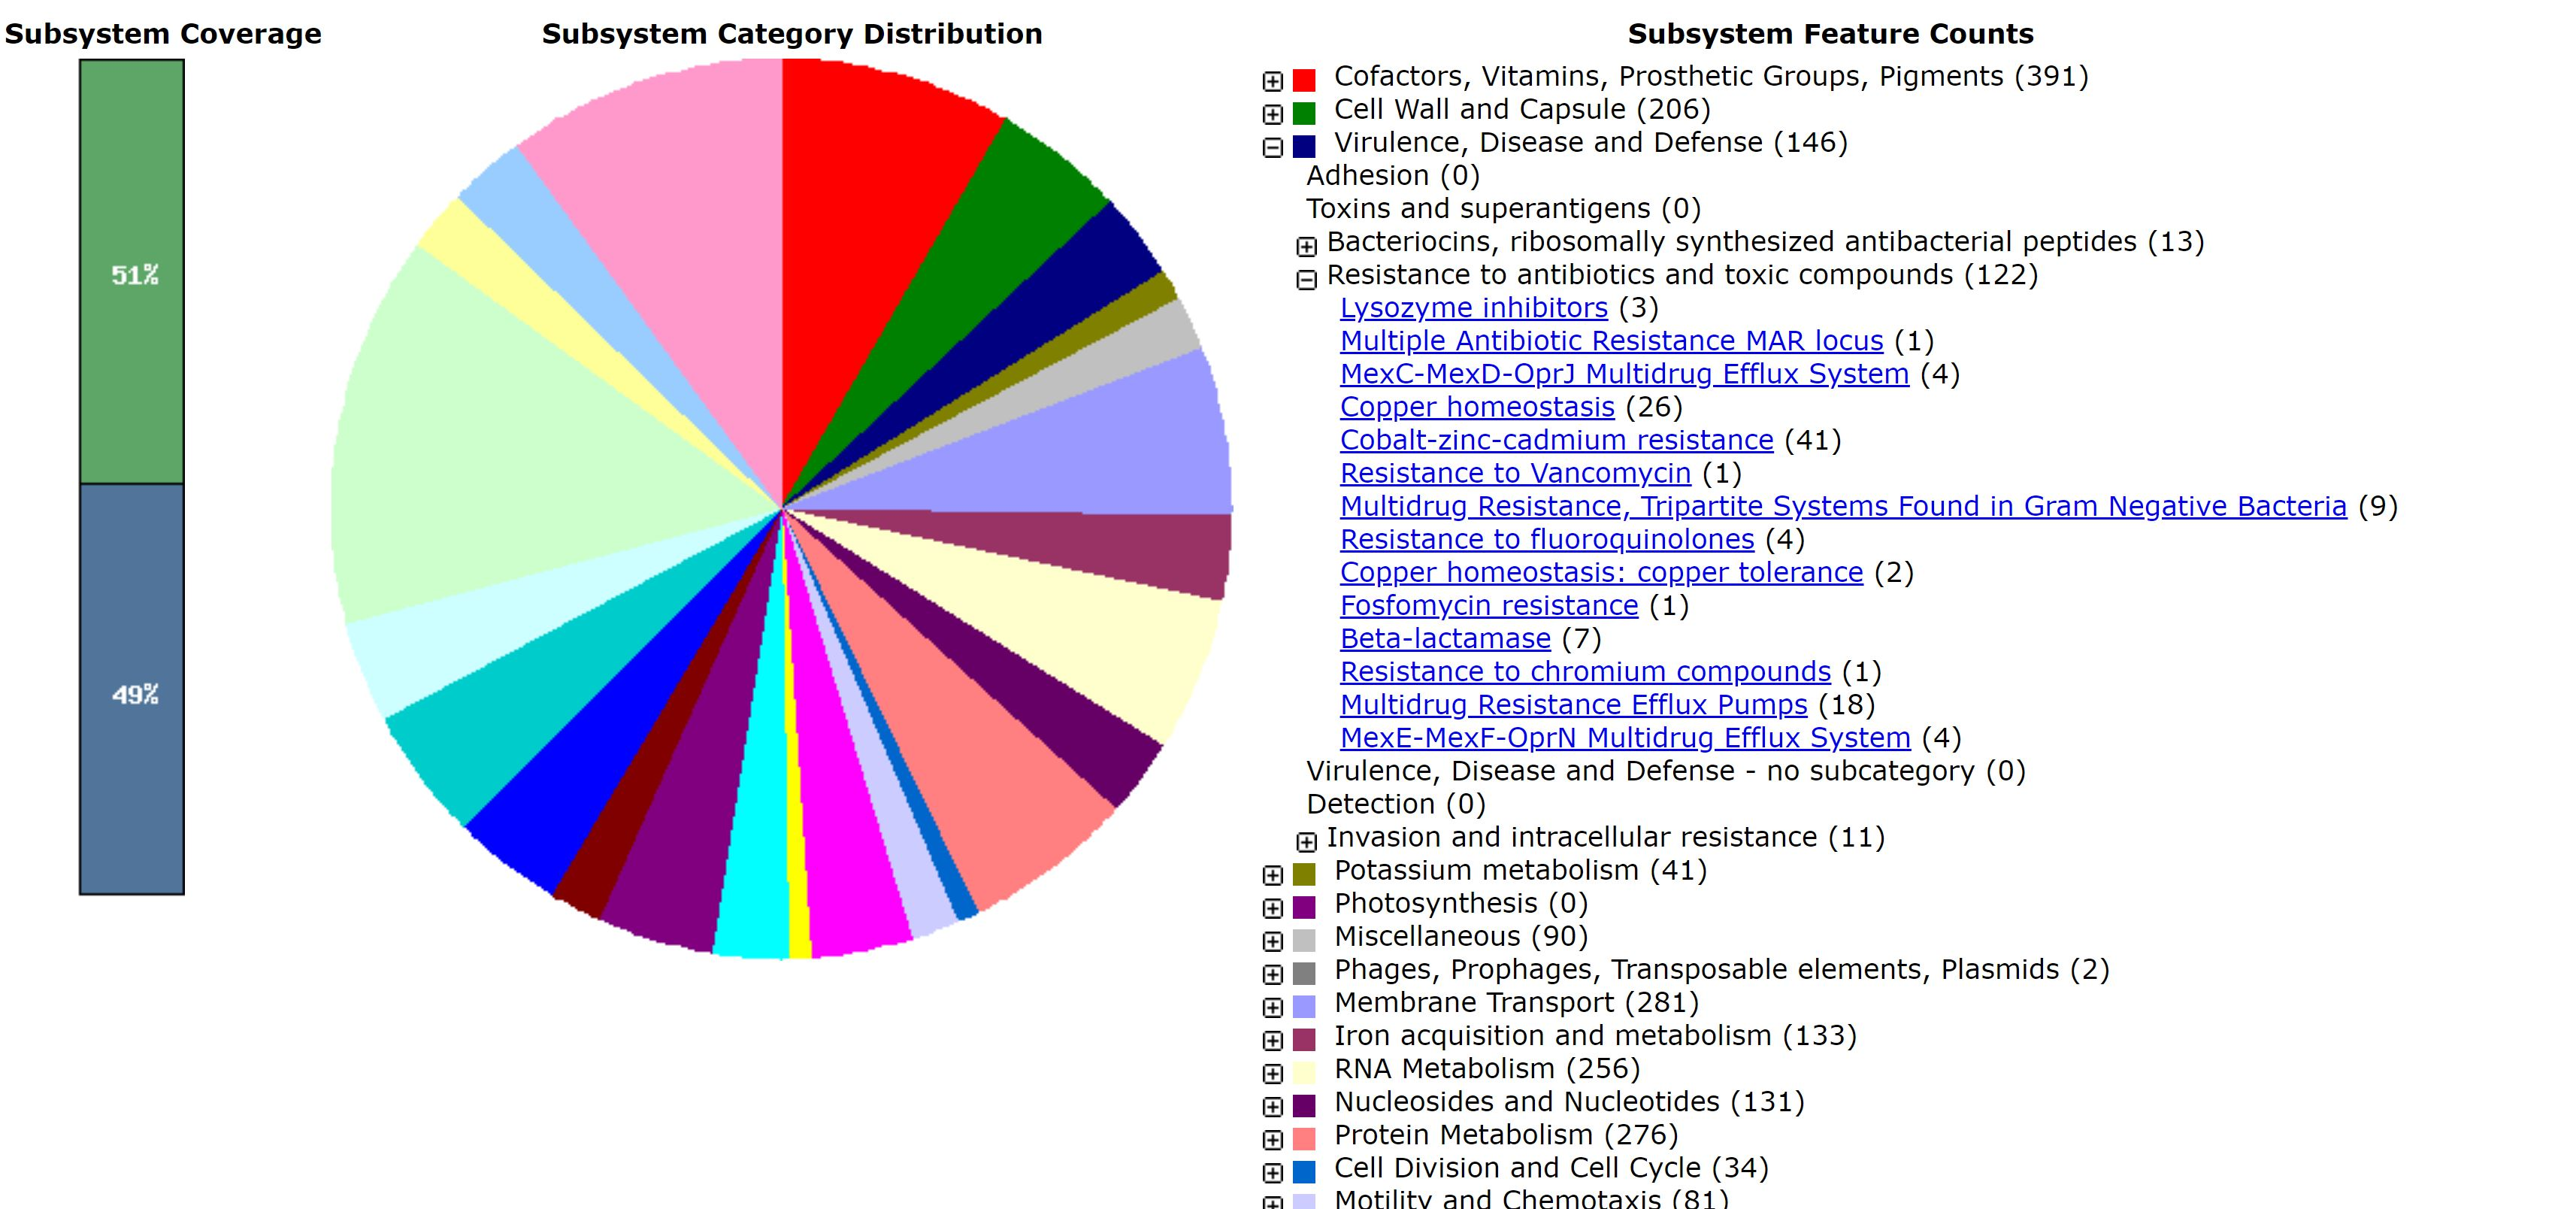

In [13]:
Image(filename='PA_antibiotic.JPG')

### There are many genes involved in iron uptake and metabolism - an essential part to P. Aeruginosa's growth and virulence (discussed below) - (again note that this is the graph generated for our assembled genome, which has a closest neighbor of P. Aeuriginosa, and not P. Aeurignosa's genome exactly)

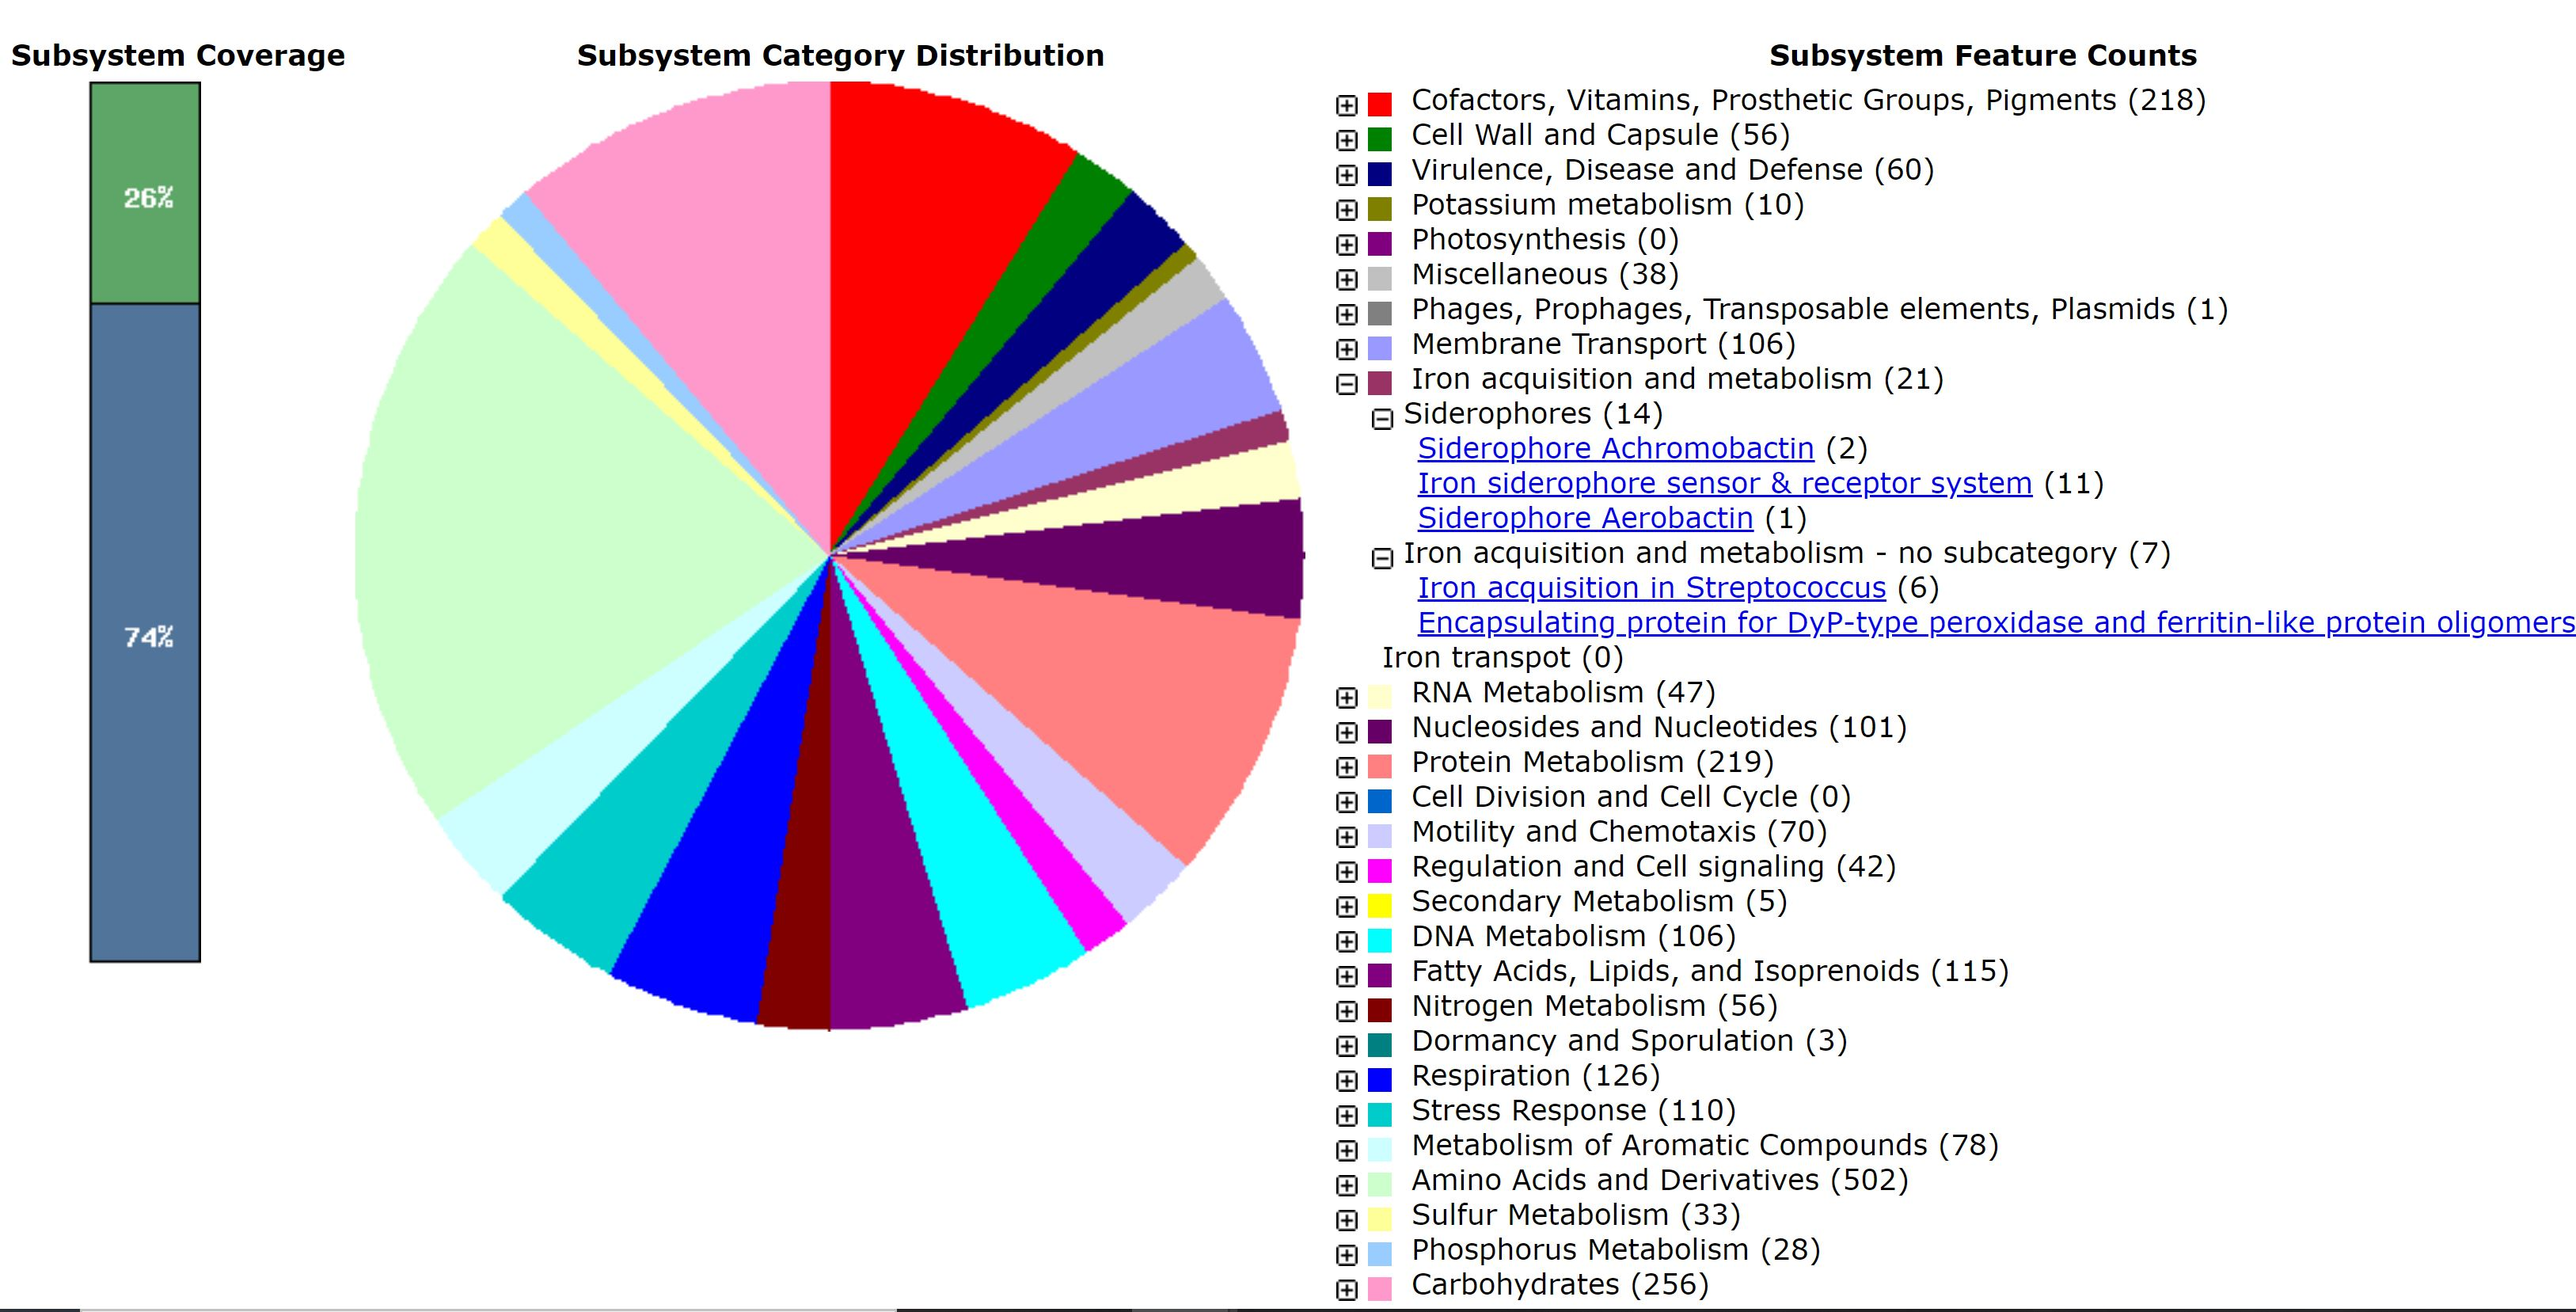

In [3]:
Image(filename='iron.JPG')

### Here is the subsystem feature counts for the actual P. Aeruginosa genome with expanded view for iron acquisition and metabolism

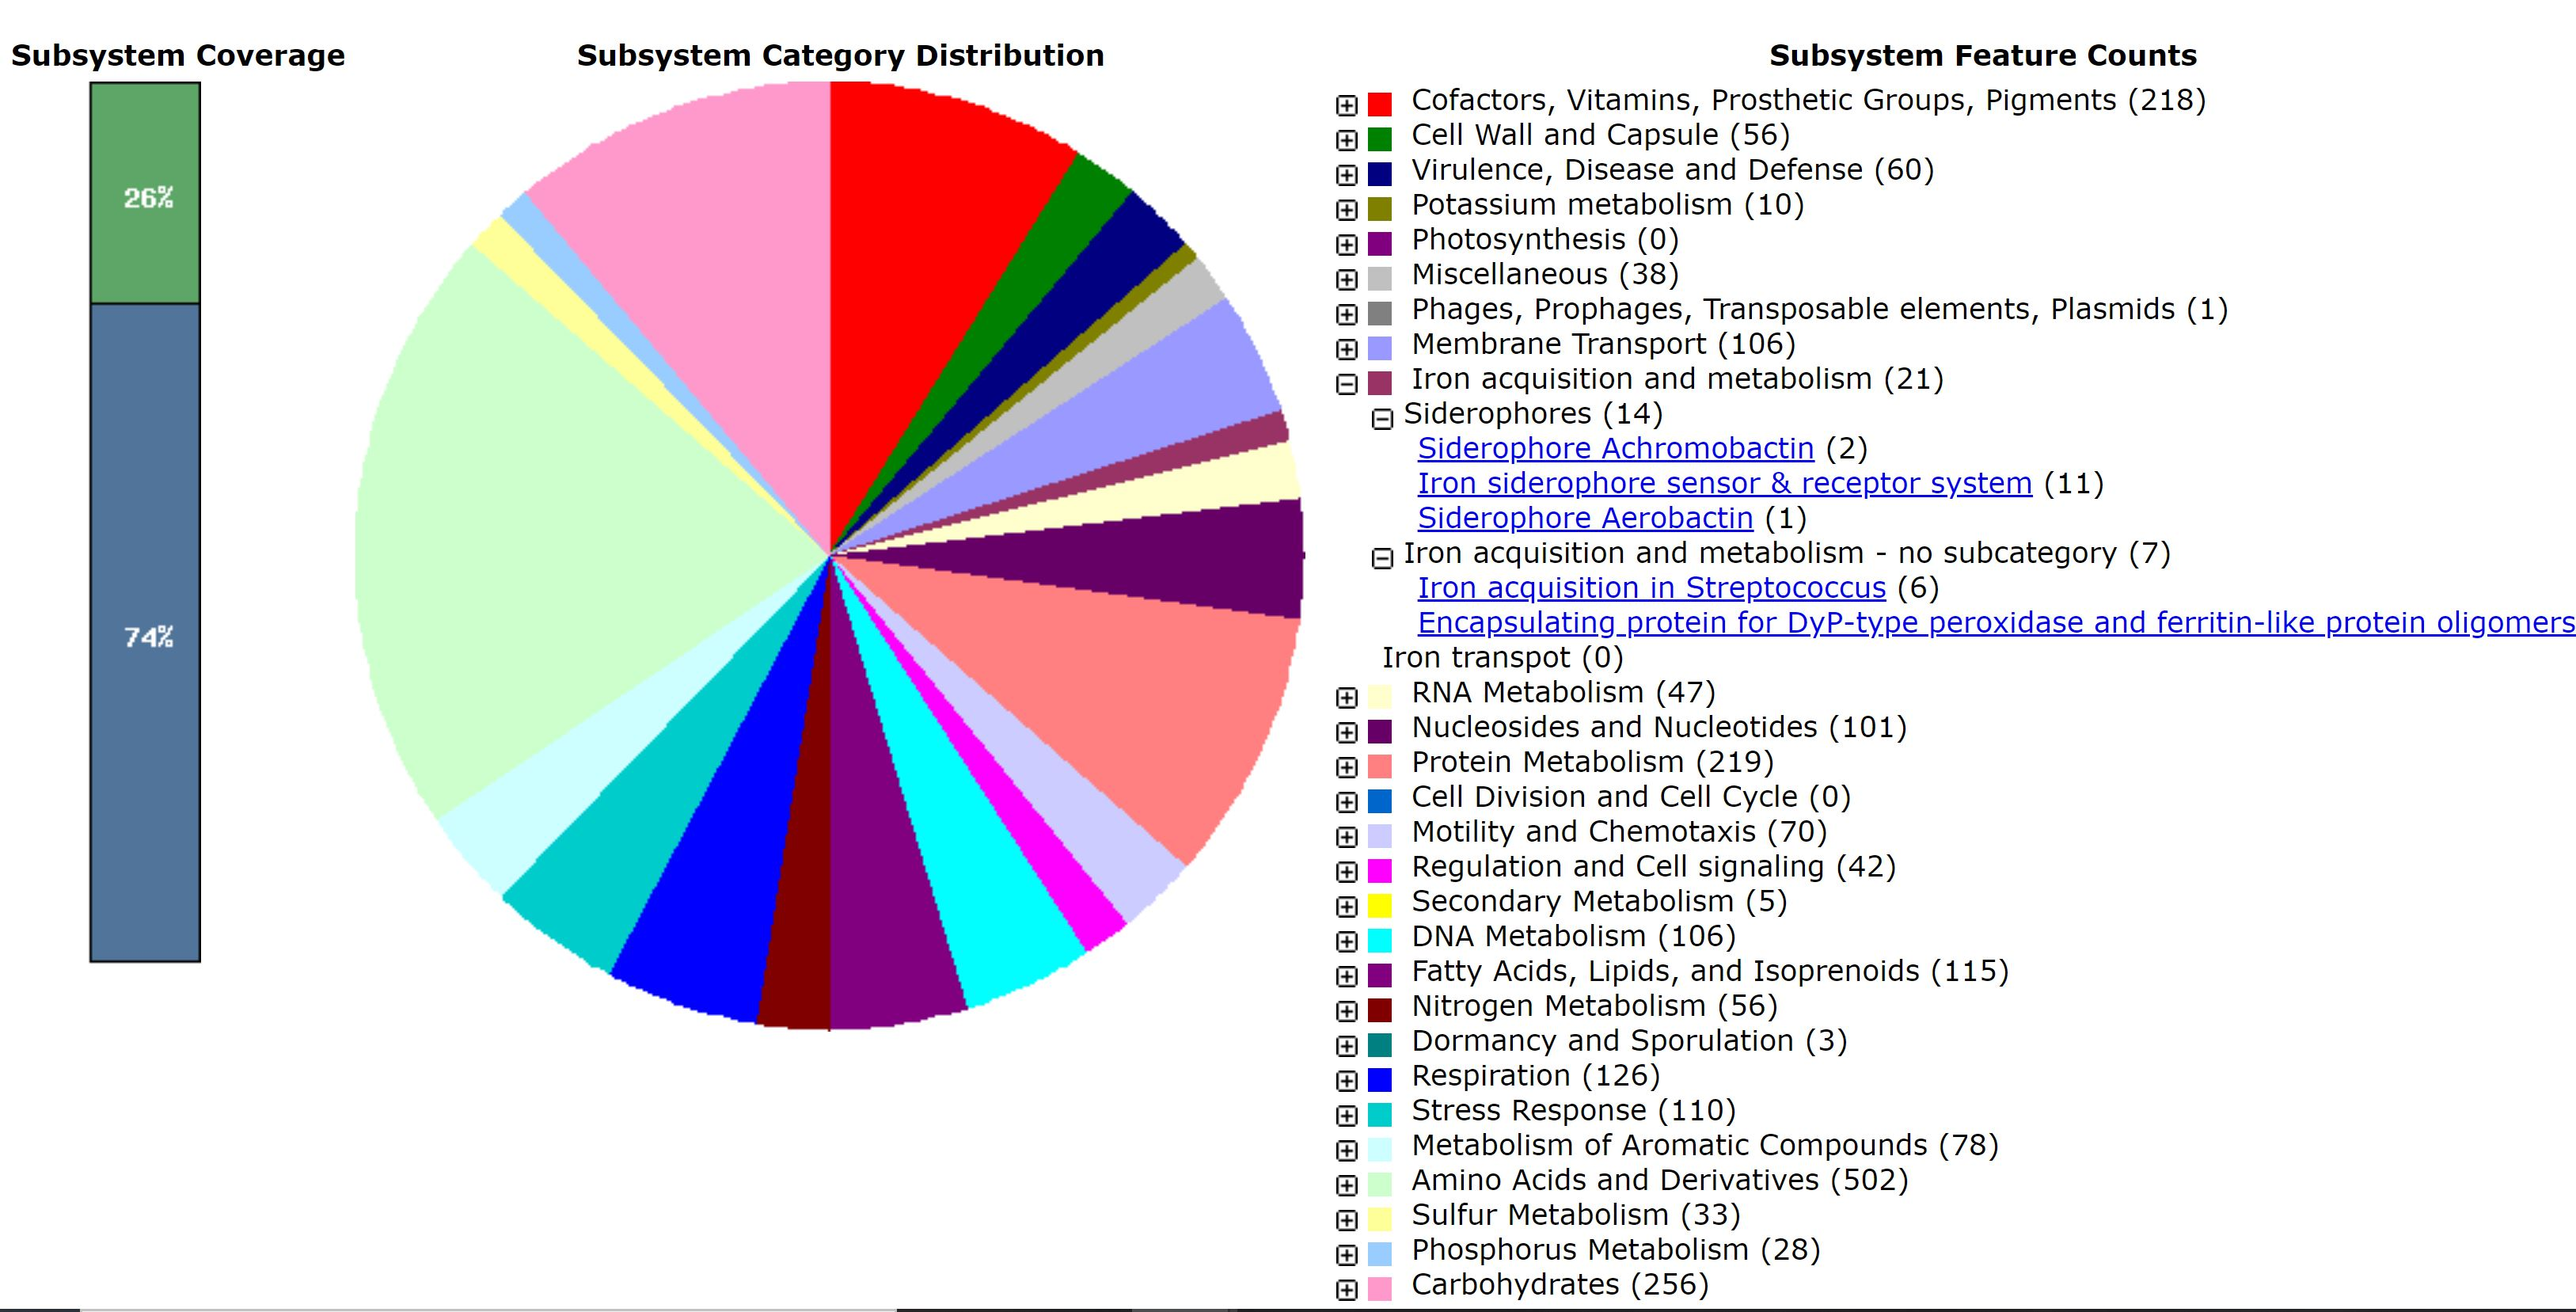

In [4]:
Image(filename='iron.JPG')

***P. Aeruginosa Iron Uptake:*** P. Aeruginosa virulence has been shown to require iron - not just for growth, but for successful infection. Often, plants and animals will have evolved protection systems that sequester iron and with-hold it from invading bacteria. P. Aeruginosa (and many other psuedomonas species) have themselves evolved other mechanisms to gather iron in iron-starved conditions - namely extremely high-affinity chelators called siderophores and other enzymes that steal iron and heme from host cells. Thus, the ability of pathogenic bacteria like P. Aeruginosa to acquire iron in hosts is essential for their growth and infection - as demonstrated by the two papers below. In animals, iron is largely bound to proteins such as transferrin, lactoferrin, and ferritin and bound as heme to hemoglobin. P. aeurginosa's systems for iron uptake include pyoverdine and pyochelin siderophores and two systems for heme uptake. <br>

(1) In the first paper I looked at, Meyer, et al (1996) thorougly proved that pyoverdin, the main siderophore in iron-gathering capacity, is essential for P. Aeruginosa virulence. Specifically, they were trying to show that pyoverdin competed with human iron-binding protein transferrin for iron. First, they created pyoverdin deficient P. Aeruginosa mutants (PAO1 strain). The mutants showed no virulence when injected into burned (immnuocompromised) mice; however, when purified wild-type pyoverdin was supplemented into the medium, virulence was restored. In vitro, they saw rapid removal of iron in an iron-pyoverdin medium. Second, in order to show the competition between pyoverdin and transferrin for iron, wild-type and pyoverdin-deficient mutants were grown in iron-containing media supplemented with transferrin. The mutant condition's growth was fully inhibited when compared to the wild-type condition; moreover, when adding pyoverdin to the media, growth was restored - showing that pyoverdin was key to gathering iron, largely from taking iron from transferrin for its own use. Thus, their results show that pyoverdin does compete with transferrin and is essential to virulence. This is particularly interesting in human infection where pyoverdin will deplete host cells of needed iron while simulteously increasing P. Aeruginosa's virulent capacity. 

(2) Takase et al (2000) looked to determine the contribution of the gene TonB (a cytoplasmic membrane protein) in P. Aeruginosa's high affinity iron gathering. They created two sets of mutants - one derived from the wild-type strain PAO1 with TonB inactivated and a second derived from a strain that had pyoverdin and.or pyochelin also inactivated. With TonB inactivation, P. aeruginosa was unable to acquire iron from the transferrin (added to the media), even with pyoverdin or pyochelin siderophore present. Addition of a plasmid containing a functional TonB gene showed restoration of TonB mutant growth (with no additional supplementation) and restoration of the pyoverdin/pyochelin-deficient TonB mutants when pyoverdin, pyochelin, hemin, or hemoglobin was added. Next, they carried out survival experiments in mice. The TonB mutant of PAO1 could not grow in vivo, such as in the muscles and lungs of immunosuppressed mice, and could not kill any of the animals. The growth and killing capacity of P. Aeruginosa was restored when the TonB plasmid was delivered to the mutant cells prior to infection. Thus, TonB is essential to P. Aeruginosa's siderophore's iron-gathering capabilities. 

Ultimately, pathogenic bacteria like P. Aeruginosa have evolved sophisticated iron gathering systems whose capabilities rely on high affinity iron siderophores and heme uptake enzymes which themselves also rely on membrane proteins like TonB. This is required for P. Aeruginosa's virulence and growth.

### Identifying the genes involved in Iron uptake and metabolism is very streamlined in RAST.Their roles make much more sense now in ithe context of the two papers. Below is a small snapshot of the subsystem of PAO1 P. Aeruginosa. Note that this is only a small sample (there are 101 total involved)...TonB and other receptor-signalling proteins are farther into the list. This is using the actual P. Aeruginosa genome annotations and not our assembled genome directly. But the characteristics are very similar (many siderophore genes for pyoverdin and pyochelin as well as transport proteins). 

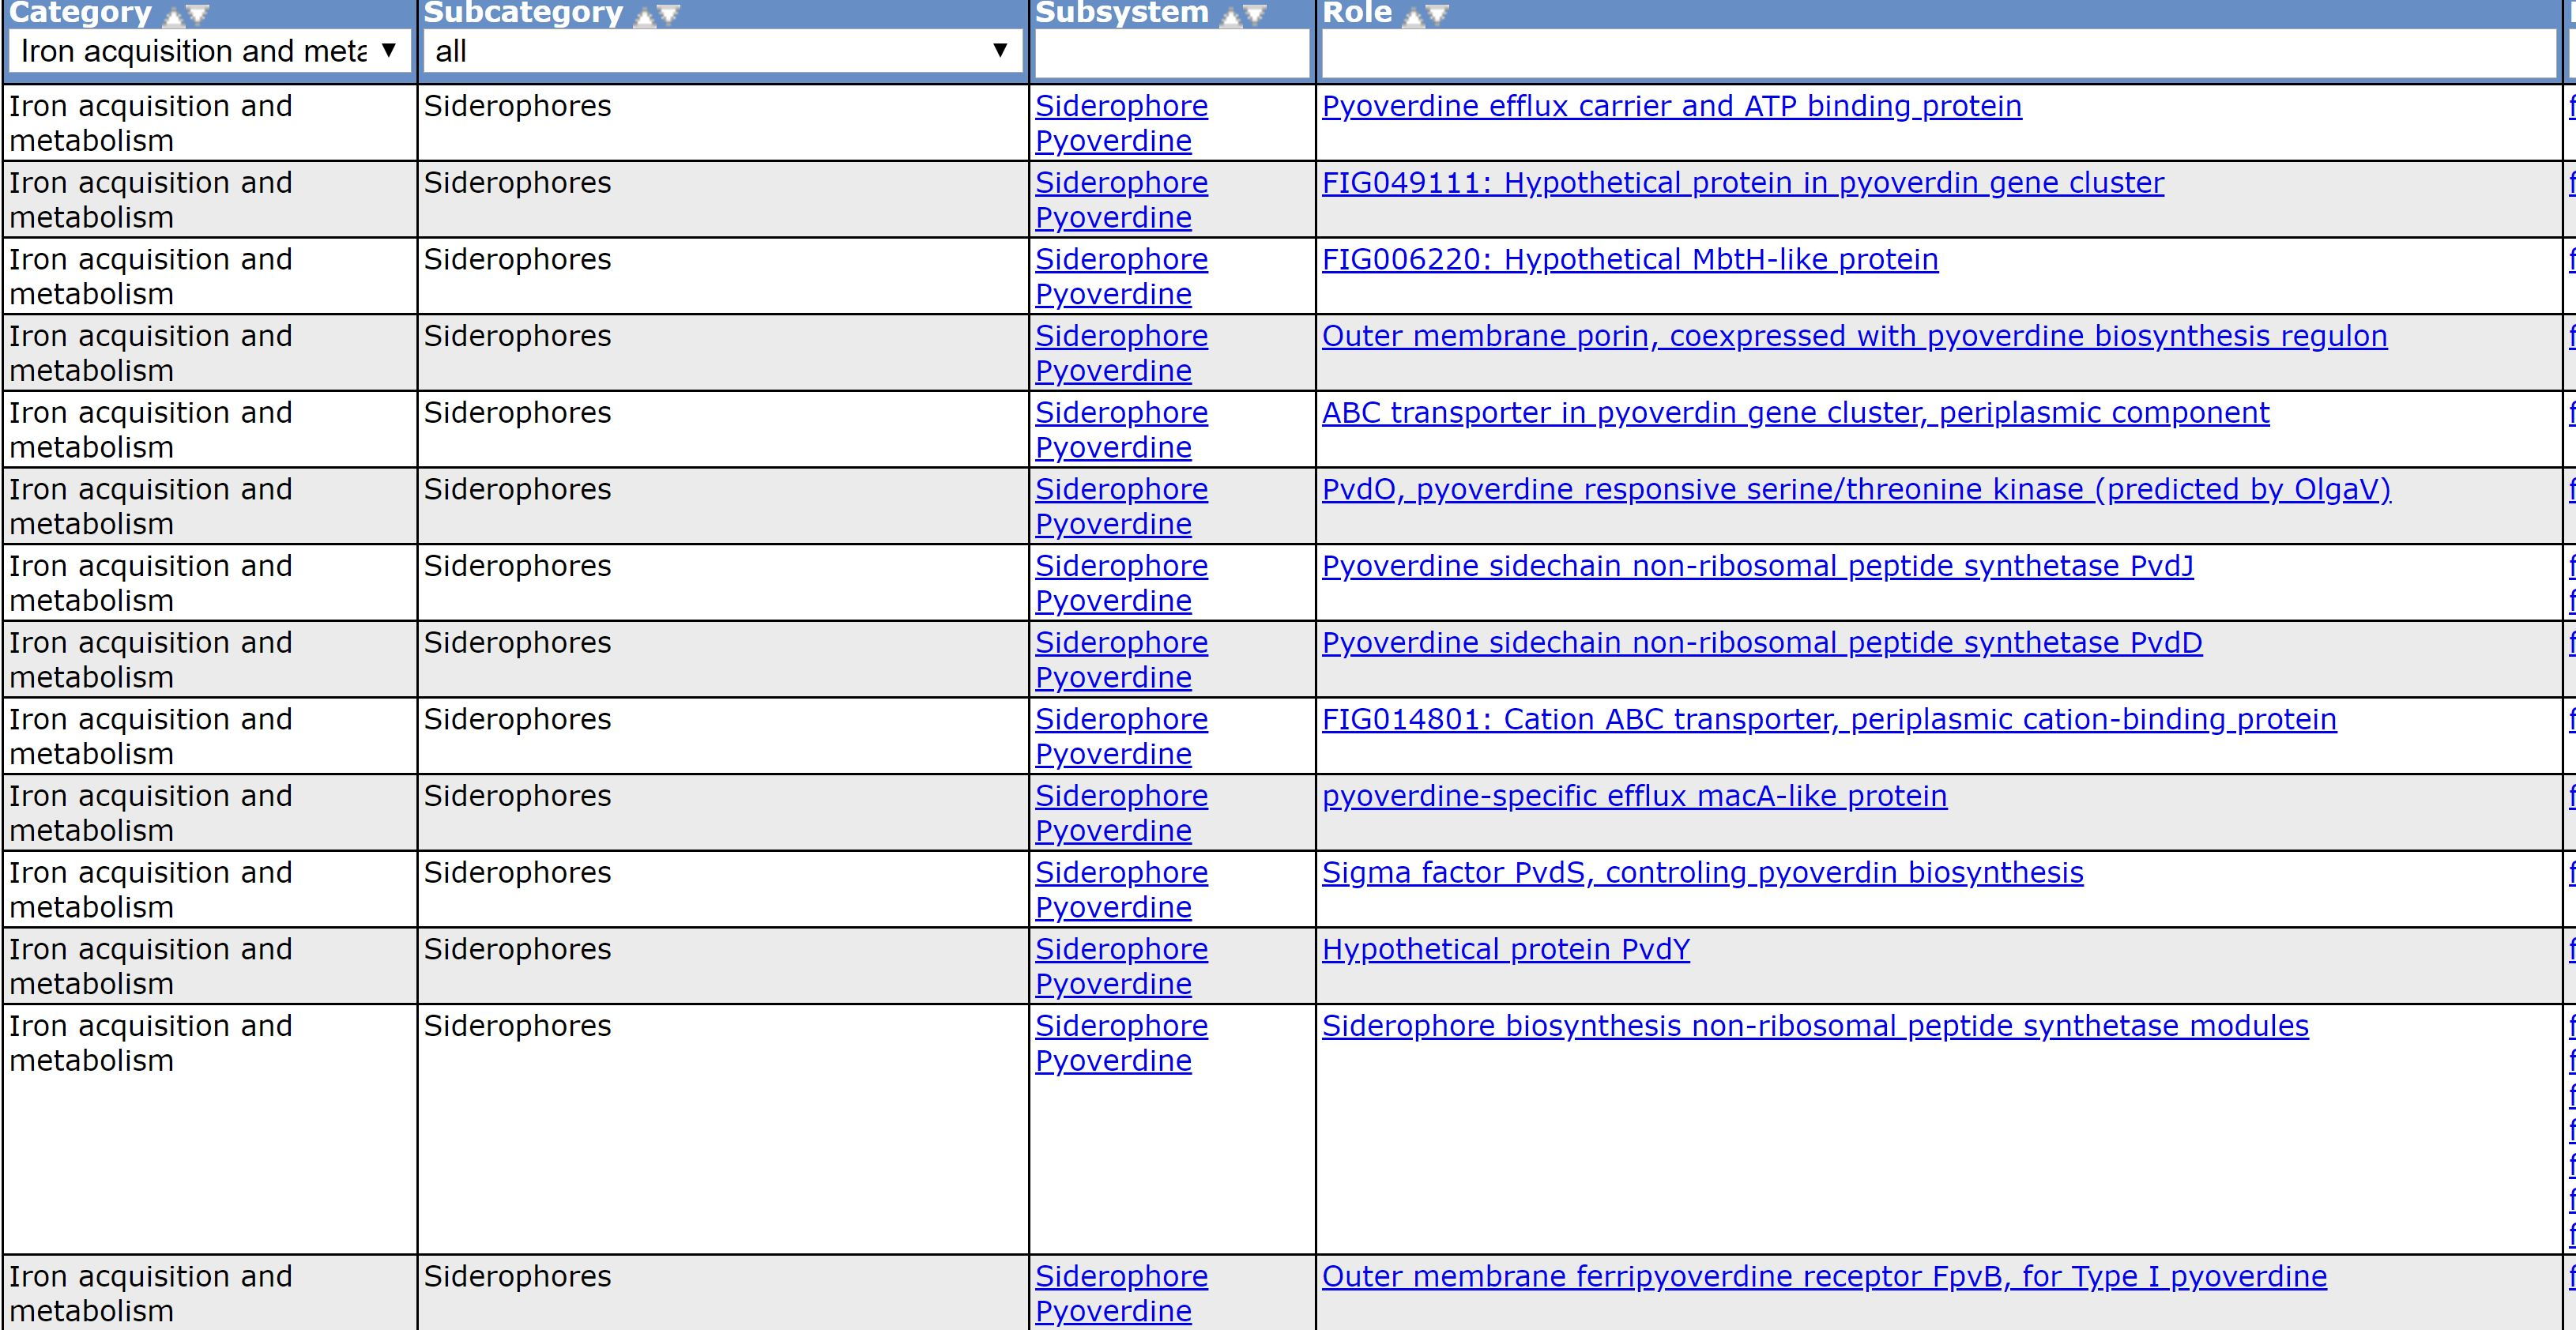

In [10]:
Image(filename='iron2.JPG')

**CITATIONS:** <br>
(1) Meyer JM, Neely A, Stintzi A, Georges C, Holder IA. 1996. _Pyoverdin is essential for virulence of Pseudomonas aeruginosa_. Infect Immun 64:518–523.

(2) Takase H, Nitanai H, Hoshino K, Otani T. 2000. _Requirement of the Pseudomonas aeruginosa tonB gene for high-affinity iron acquisition and infection_. Infect Immun 68:4498–4504.

## We also sent our contigs.fasta file to be annotated with BASys but the servers are all overloaded with 30+ submissions in all the queues. See below for the submission, which has not begun yet and could take quite a bit longer to receive back. 

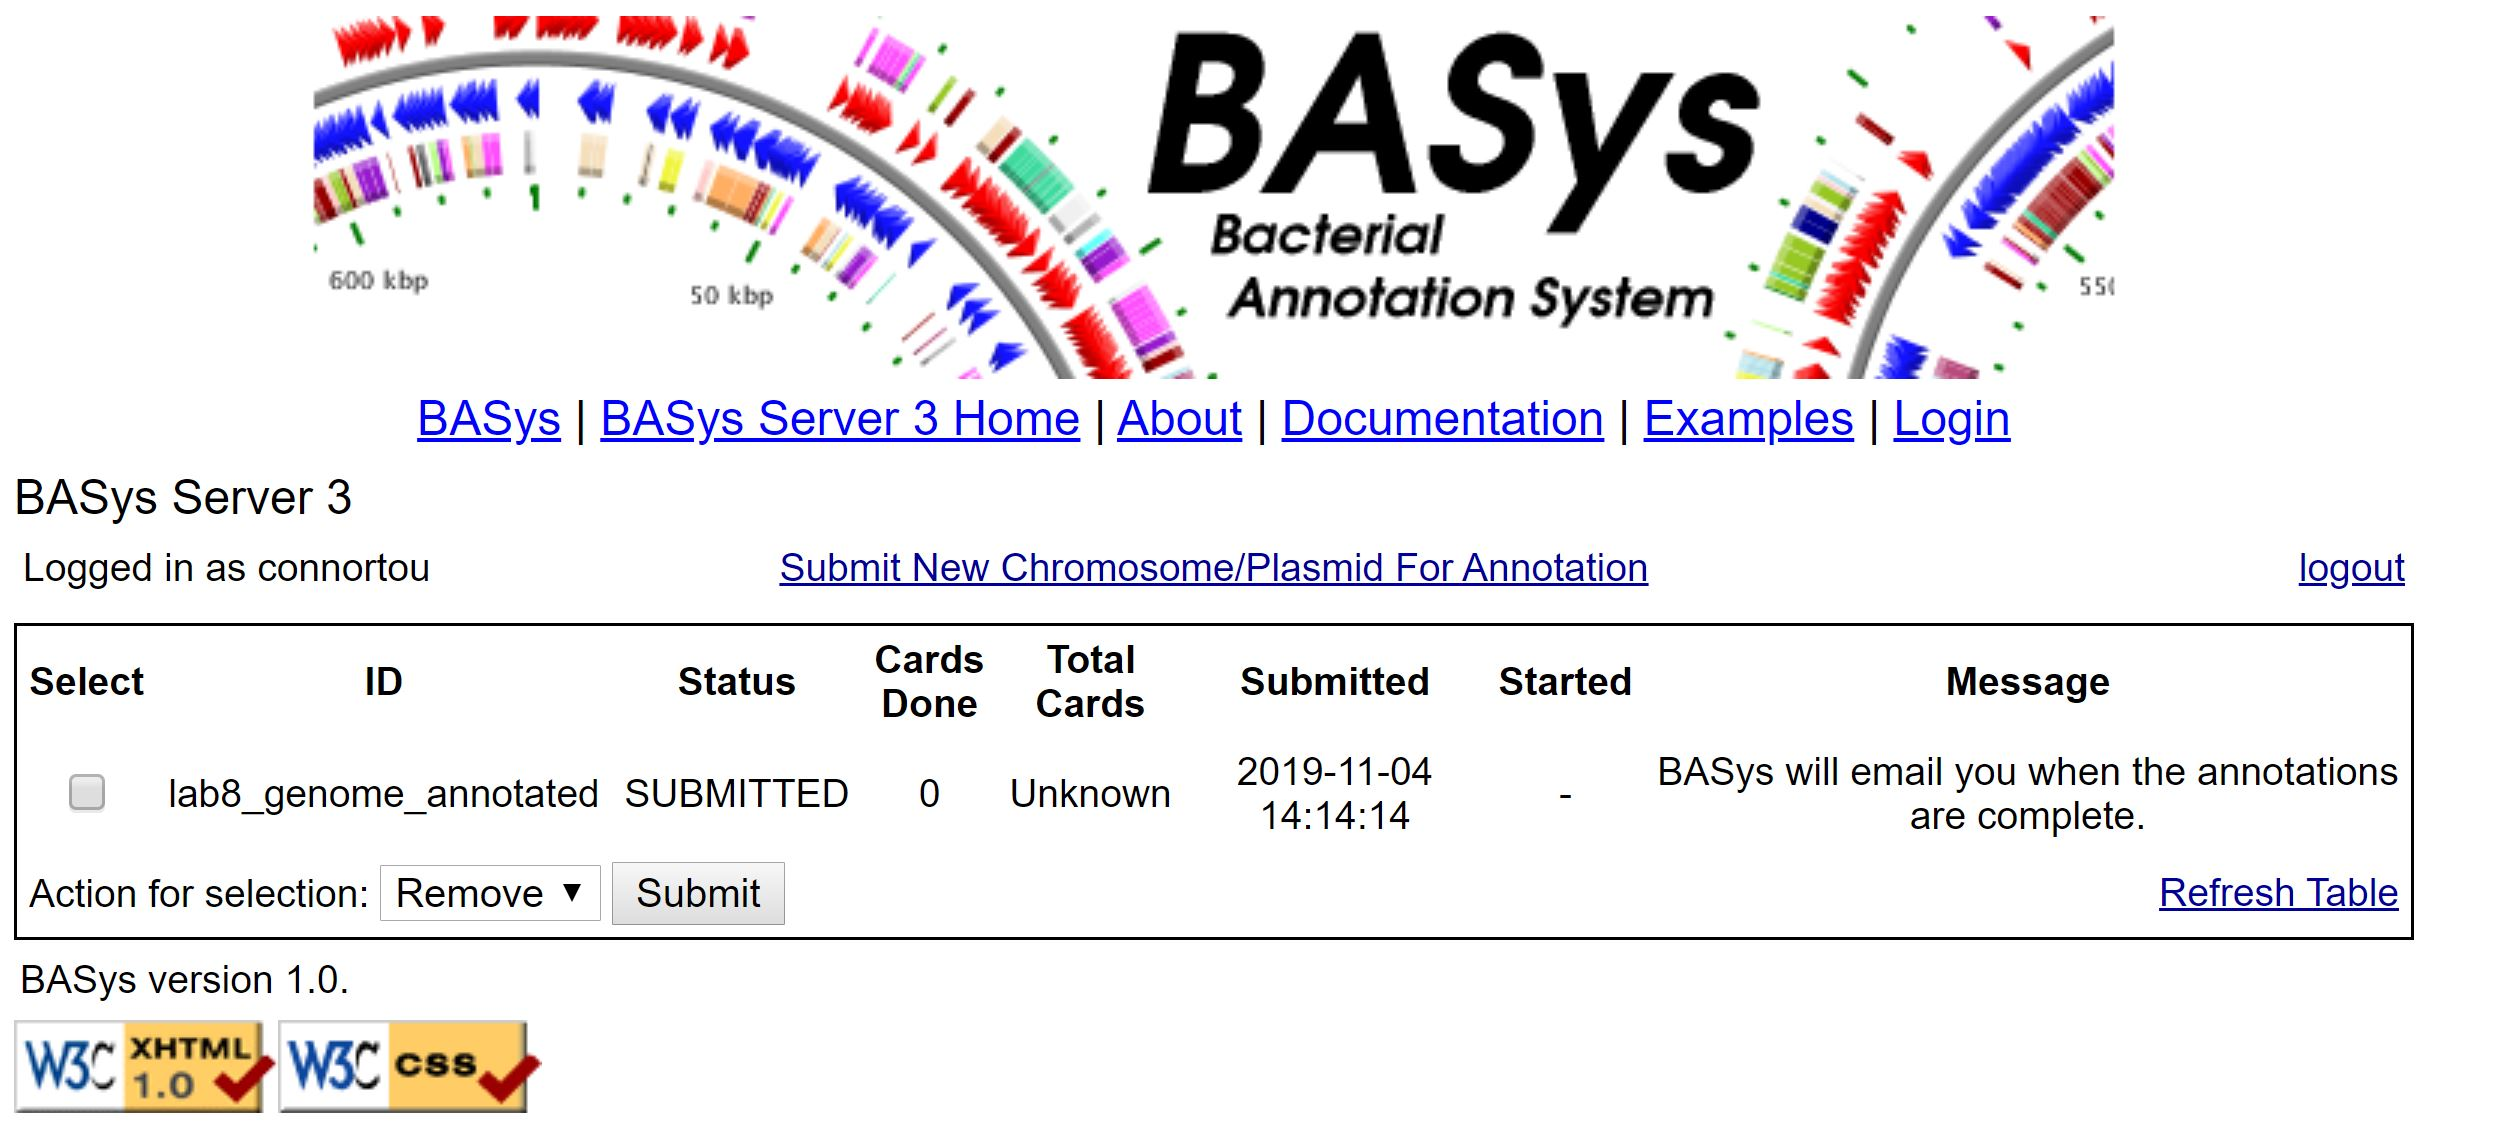

In [5]:
Image(filename='basys.JPG')

# END OF LAB 8 & 9